In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing all nltk (natural language Toolkit) related libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('all')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# importing Regular Expressions
import re
import string

# Bag of Words representation
from sklearn.feature_extraction.text import CountVectorizer

#Emotion
from nrclex import NRCLex

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\jerra\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\jerra\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\jerra\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\jerra\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\jerra\AppData\Roaming\nltk_data...
[nltk_data]    | 

In [15]:
df1 = pd.read_csv('C:/Users/jerra/Desktop/DAC Projects/ProjectFlux/Clinical Trials Website Webscrape/1st_Clinical_Trials_WebScrape.csv')
df2 = pd.read_csv('C:/Users/jerra/Desktop/DAC Projects/ProjectFlux/Clinical Trials Website Webscrape/2nd_Clinical_Trials_WebScrape.csv')
df3 = pd.read_csv('C:/Users/jerra/Desktop/DAC Projects/ProjectFlux/Clinical Trials Website Webscrape/3rd_Clinical_Trials_WebScrape.csv')
df4 = pd.read_csv('C:/Users/jerra/Desktop/DAC Projects/ProjectFlux/Clinical Trials Website Webscrape/4th_Clinical_Trials_WebScrape.csv')
df5 = pd.read_csv('C:/Users/jerra/Desktop/DAC Projects/ProjectFlux/Clinical Trials Website Webscrape/5th_Clinical_Trials_WebScrape.csv')
df6 = pd.read_csv('C:/Users/jerra/Desktop/DAC Projects/ProjectFlux/Clinical Trials Website Webscrape/6th_Clinical_Trials_WebScrape.csv')
df7 = pd.read_csv('C:/Users/jerra/Desktop/DAC Projects/ProjectFlux/Clinical Trials Website Webscrape/7th_Clinical_Trials_WebScrape.csv')
df8 = pd.read_csv('C:/Users/jerra/Desktop/DAC Projects/ProjectFlux/Clinical Trials Website Webscrape/8th_Clinical_Trials_WebScrape.csv')
df9 = pd.read_csv('C:/Users/jerra/Desktop/DAC Projects/ProjectFlux/Clinical Trials Website Webscrape/9th_Clinical_Trials_WebScrape.csv')
df10 = pd.read_csv('C:/Users/jerra/Desktop/DAC Projects/ProjectFlux/Clinical Trials Website Webscrape/10th_Clinical_Trials_WebScrape.csv')
df11 = pd.read_csv('C:/Users/jerra/Desktop/DAC Projects/ProjectFlux/Clinical Trials Website Webscrape/11th_Clinical_Trials_WebScrape.csv')
df12 = pd.read_csv('C:/Users/jerra/Desktop/DAC Projects/ProjectFlux/Clinical Trials Website Webscrape/12th_Clinical_Trials_WebScrape.csv')
df13 = pd.read_csv('C:/Users/jerra/Desktop/DAC Projects/ProjectFlux/Clinical Trials Website Webscrape/13th_Clinical_Trials_WebScrape.csv')
df14 = pd.read_csv('C:/Users/jerra/Desktop/DAC Projects/ProjectFlux/Clinical Trials Website Webscrape/14th_Clinical_Trials_WebScrape.csv')
df15 = pd.read_csv('C:/Users/jerra/Desktop/DAC Projects/ProjectFlux/Clinical Trials Website Webscrape/15th_Clinical_Trials_WebScrape.csv')
df16 = pd.read_csv('C:/Users/jerra/Desktop/DAC Projects/ProjectFlux/Clinical Trials Website Webscrape/16th_Clinical_Trials_WebScrape.csv')
df17 = pd.read_csv('C:/Users/jerra/Desktop/DAC Projects/ProjectFlux/Clinical Trials Website Webscrape/17th_Clinical_Trials_WebScrape.csv')

data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17], ignore_index=True)

In [16]:
data.to_csv('C:/Users/jerra/Desktop/DAC Projects/ProjectFlux/Clinical Trials Website Webscrape/Clinical_Trials_Website_Webscrape.csv', index = False)

In [17]:
#reading the csv file
data = pd.read_csv('C:/Users/jerra/Desktop/DAC Projects/ProjectFlux/Clinical Trials Website Webscrape/Clinical_Trials_Website_Webscrape.csv')

#displaying data
data.head(10)

,First Submitted Date,Brief Summary,Detailed Description,Condition,Intervention,Eligibility Criteria,Gender,Ages
0,10-Mar-23,Purpose of this study was to assess the balanc...,Not Provided,Balance Level of Elite Amputee Football Players,Other: Balance test\n10 second left- or right-...,Inclusion Criteria:\nparticipant of European A...,Sexes Eligible for Study: Male,"16 Years and older (Child, Adult, Older Adult)"
1,27-Feb-23,The aim of this study is to assess the effect ...,Anterior knee pain is an important cause of pe...,Anterior Knee Pain Syndrome,Procedure: Lateral retinacular release\nDuring...,Inclusion Criteria:\ndiagnosis of knee osteoar...,Sexes Eligible for Study: All,"40 Years to 90 Years (Adult, Older Adult)"
2,27-Feb-23,The primary objective of the present study wil...,Materials and methods:\nThe study will be atte...,Obesity,Other: Passive knee flexion-extension + Cycle ...,Inclusion Criteria:\nBMI > 97th percentile for...,Sexes Eligible for Study: Male,"15 Years to 40 Years (Child, Adult)"
3,28-Dec-22,"Wireless EFM shortens labor duration, increase...",Problem Wired Electronic Fetal Monitoring (EFM...,Pregnancy Related,Device: wireless fetal monitoring system\nThe ...,Inclusion Criteria:\nPregnant women who are wi...,Sexes Eligible for Study: Female,18 Years to 40 Years (Adult)
4,27-Jan-23,Comparative study between pulsed radiofrequenc...,"Prospective, randomized, comparative study of ...",Shoulder Pain\nRotator Cuff Impingement Syndro...,Drug: Suprascapular nerve block with bipuvacai...,"Inclusion Criteria:\nAge over 18 years old,\nC...",Sexes Eligible for Study: All,"18 Years to 90 Years (Adult, Older Adult)"
5,4-Mar-23,Infections with SARS-CoV-2 result in a systemi...,Background: The essential micronutrient zinc b...,Zinc Deficiency\nSars-CoV-2 Infection,Dietary Supplement: Zinc Acetate\nEach partici...,Inclusion Criteria:\nSARS-CoV-2 infection requ...,Sexes Eligible for Study: All,"18 Years and older (Adult, Older Adult)"
6,19-Mar-23,"Development; It covers the areas of physical, ...",It is an observational study. Purpose of the s...,"Development, Infant\nDevelopment Delay",Other: Group1\n75 healthy infants were include...,Inclusion Criteria:\n75 healthy infants aged 6...,Sexes Eligible for Study: All,6 Months to 24 Months (Child)
7,17-Feb-23,The goal of this clinical trial is to analyze ...,Not Provided,Congenital Heart Disease in Children\nRSV,Behavioral: Phone call\nParticipants were give...,Inclusion Criteria:\nDiagnosis of congenital h...,Sexes Eligible for Study: All,1 Month to 24 Months (Child)
8,15-Sep-21,It is aIt is aimed to examine the possible ben...,The 90 people between the ages of 18-35 will b...,"Healthy\nSports Physical Therapy\nActivity, Motor",Device: Unilateral Stimulation\nWith the Vagus...,Inclusion Criteria:\nHealthy individuals betwe...,Sexes Eligible for Study: All,18 Years to 35 Years (Adult)
9,9-Mar-23,The goal of this observational study is to tes...,The study employed a mixed methods sequential ...,Internet-based Intervention,Other: Usability testing\nUsability testing,Inclusion criteria:\nage >18 years\nbe able to...,Sexes Eligible for Study: All,"18 Years and older (Adult, Older Adult)"


In [18]:
#getting the most common conditions within our data
condition_counts = data["Condition"].value_counts()
condition_counts

Healthy                                                                                                                                                1265
COVID-19                                                                                                                                                485
Healthy Volunteers                                                                                                                                      481
Covid19                                                                                                                                                 395
Stroke                                                                                                                                                  246
                                                                                                                                                       ... 
Microcirculation                                                

In [19]:
#regular expression to search "covid" or "covid-19" variations
Covid_keyword = r'covid-?19'
covid = data["Condition"].str.contains(Covid_keyword, case = False, regex = True)
covid_df = data[covid]

#covid dataset
covid_df

,First Submitted Date,Brief Summary,Detailed Description,Condition,Intervention,Eligibility Criteria,Gender,Ages
30,13-Mar-23,"Health workers, especially those in patient-fa...","On 11 March 2020, the rapidly spreading novel ...",COVID-19,Biological: BNT162b2 COVID-19 Vaccine\nBNT162b...,Inclusion Criteria:\nHealthcare workers (aged ...,Sexes Eligible for Study: All,"18 Years and older (Adult, Older Adult)"
31,15-Mar-23,The goal of this randomized placebo-controlled...,The risk of severe acute respiratory syndrome ...,COVID-19\nHormone Replacement Therapy,Drug: Climara 0.1Mg/24Hr Transdermal System\nT...,Inclusion Criteria:\nFemale patients diagnosed...,Sexes Eligible for Study: Female,"18 Years and older (Adult, Older Adult)"
45,14-Mar-23,Our study has the objective of identifying the...,Introduction: COVID 19 pandemic continues to p...,COVID-19 Pandemic\nObesity,Device: Obesity\nthe objective of identifying ...,Inclusion Criteria:\nAll patients presenting a...,Sexes Eligible for Study: All,"18 Years to 80 Years (Adult, Older Adult)"
65,12-Mar-23,The aim of the project is to identify the prev...,In the follow-up of patients with Covid-19 inf...,Cardiac Complication\nCOVID-19 Pneumonia,Not Provided,Inclusion Criteria:\nPatient with previous hos...,Sexes Eligible for Study: All,"18 Years to 90 Years (Adult, Older Adult)"
87,9-Mar-23,This descriptive study examines neutralizing a...,This research is a cross-sectional study with ...,COVID-19,Diagnostic Test: COVID-19 Antibody\nThis descr...,Inclusion Criteria:\nHealth workers who receiv...,Sexes Eligible for Study: All,18 Years to 60 Years (Adult)
...,...,...,...,...,...,...,...,...
26565,6-Feb-20,The study aims to evaluate the efficacy and sa...,There is no vaccine or antiviral treatment for...,"Pneumonia, Pneumocystis\nCoronavirus\nCOVID-19",Drug: Hydroxychloroquine\nSubjects take hydrox...,Inclusion Criteria:\nThe participants were dia...,Sexes Eligible for Study: All,"18 Years and older (Adult, Older Adult)"
26954,23-Jan-20,"In this multi-center, randomized, control stud...",COVID-19 is a novel coronavirus that was initi...,COVID-19 Infections,Drug: methylprednisolone therapy\nMethylpredni...,Inclusion Criteria:\nAdult\nPCR confirmed COVI...,Sexes Eligible for Study: All,"18 Years and older (Adult, Older Adult)"
28879,8-Nov-19,The aim of the study is to identify what sende...,The investigators will recruit approximately 3...,"Flu, Human\nInfluenza, Human\nCovid19",Behavioral: Video about safety and effectivene...,Inclusion Criteria:\nAge: See above.\nEducatio...,Sexes Eligible for Study: Male\nGender Based E...,18 Years to 51 Years (Adult)
37101,1-Feb-19,Despite progress in reducing tuberculosis (TB)...,Pneumonia is the leading cause of death in chi...,Tuberculosis\nSevere Pneumonia\nCovid19,Diagnostic Test: Xpert MTB/RIF Ultra (Ultra)\n...,Inclusion criteria:\nChildren aged 2 to 59 mon...,Sexes Eligible for Study: All,2 Months to 59 Months (Child)


In [20]:
#cancer dataset
Cancer_keyword = 'cancer'
cancer = data["Condition"].str.contains(Cancer_keyword, case = False)
cancer_df = data[cancer]
cancer_df

,First Submitted Date,Brief Summary,Detailed Description,Condition,Intervention,Eligibility Criteria,Gender,Ages
21,22-Feb-23,This study aims to examine the effects of lymp...,This study aims to examine the effects of lymp...,Breast Cancer Related Lymphedema\nBreast Cance...,Not Provided,Inclusion Criteria:\nVolunteering to participa...,Sexes Eligible for Study: Female\nGender Based...,18 Years to 50 Years (Adult)
105,24-Feb-23,The main purpose of this study is to investiga...,Not Provided,Cancer,Device: Hitachi's Heavy Ion Beam Therapy Syste...,Inclusion Criteria:\nMust be 20 years of age i...,Sexes Eligible for Study: All,"20 Years and older (Adult, Older Adult)"
120,16-Feb-23,"Femal, a food supplement based on pollen extra...",Not Provided,Breast Cancer\nMenopause,"Other: dietary supplement\nFemal, a food suppl...",Inclusion Criteria:\n- patients with a history...,Sexes Eligible for Study: Female\nGender Based...,"Child, Adult, Older Adult"
224,2-Feb-23,The aim of this study is to evaluate the role ...,Not Provided,Neck Cancer\nLarynx\nLarynx Cancer\nNeck,Procedure: Elective bilateral neck dissection ...,Inclusion criteria\n-patients affected by recu...,Sexes Eligible for Study: All,"18 Years to 90 Years (Adult, Older Adult)"
227,17-Feb-23,Lymphatic mapping is a procedure in which all ...,"Study population:\nAged ≥18 years, with locall...",Locally Advanced Cervical Cancer,Diagnostic Test: lymphatic mapping\nPeritumora...,Inclusion Criteria:\nHistologically proven loc...,Sexes Eligible for Study: Female,"18 Years and older (Adult, Older Adult)"
...,...,...,...,...,...,...,...,...
50304,10-Jan-16,This prospective non-randomized controlled tri...,Preoperative and intraoperative blood salvage ...,Liver Cancer,Procedure: Autotransfusion\nThese group of pat...,Inclusion Criteria:\nPatients who underwent li...,Sexes Eligible for Study: All,"18 Years to 75 Years (Adult, Older Adult)"
50336,16-Jun-15,The purpose of this study is to evaluate the f...,"The investigators evaluate the feasibility, ef...",Lung Cancer,Device: VBN\nVBN is carried out by a VBN softw...,Inclusion Criteria:\nIndividuals eligible for ...,Sexes Eligible for Study: All,"18 Years and older (Adult, Older Adult)"
50337,19-May-15,"This is an open-label, multi-center, non-rando...","This is an open-label, multi-center, non-rando...",Cancer,Drug: PQR 309\nIntervention of this drug may i...,Inclusion Criteria\nPatients ≥ 18 years of age...,Sexes Eligible for Study: All,"18 Years and older (Adult, Older Adult)"
50357,14-Jan-15,Background:\n- Researchers at the National Can...,DCEG has a long history of developing and runn...,Cancer,Not Provided,INCLUSION CRITERIA:\nParticipants will be sele...,Sexes Eligible for Study: All,"35 Years to 74 Years (Adult, Older Adult)"


In [21]:
#depression-related dataset
Depression_keyword = 'depression'
depression = data["Condition"].str.contains(Depression_keyword, case = False)
depression_df = data[depression]
depression_df

,First Submitted Date,Brief Summary,Detailed Description,Condition,Intervention,Eligibility Criteria,Gender,Ages
17,28-Feb-23,The goal of this pilot study is to examine the...,More than half of U.S. college students experi...,"Depression\nAnxiety\nStress, Psychological\nMo...",Device: C-STRESS\nParticipants were asked to u...,Inclusion Criteria:\nUndergraduate or graduate...,Sexes Eligible for Study: All,18 Years to 30 Years (Adult)
111,10-Feb-23,This clinical trial compares the effects of us...,The primary objective of this randomized contr...,Anxiety\nDepression,Behavioral: Chatbot\nParticipants in this cond...,Inclusion Criteria:\ndeclaring at least mild d...,Sexes Eligible for Study: All,18 Years to 35 Years (Adult)
190,20-Feb-23,This is an observational study aimed at explor...,400 patients with chronic cardiovascular disea...,Anxiety\nDepression\nEmotional Stress\nQuality...,"Other: There was no intervention, the study wa...",Inclusion Criteria:\nBeing aged > 18 years old...,Sexes Eligible for Study: All,"18 Years to 85 Years (Adult, Older Adult)"
219,26-Feb-23,The goal of this interventional study is to ev...,Not Provided,To Determine the Incidence of Depression in Su...,Other: Counseling and Coaching\nCounseling is ...,Inclusion Criteria:\nRecruited subjects have a...,Sexes Eligible for Study: All,"18 Years and older (Adult, Older Adult)"
264,12-Feb-23,The study aimed to examine the impact of a com...,Not Provided,Depression,Behavioral: Internet-delivered Cognitive Behav...,Inclusion Criteria:\nbeing an active firefight...,Sexes Eligible for Study: All,18 Years to 50 Years (Adult)
...,...,...,...,...,...,...,...,...
50174,26-Oct-16,The purpose of this study is to determine whet...,This study is an open-label mixed-methods pilo...,Distress\nDepression\nGrief,Drug: Psilocybin\nOne individual oral psilocyb...,Inclusion Criterion:\nOlder individuals who ar...,Sexes Eligible for Study: All,"50 Years and older (Adult, Older Adult)"
50196,28-Sep-16,The purpose of this study will to be to evalua...,Health literacy is a critically important skil...,Fatigue\nDepression\nPain\nSleep Wake Disorder...,Behavioral: Tailored Intervention\nThe interve...,Inclusion Criteria:\nHave at least one chronic...,Sexes Eligible for Study: All,"40 Years and older (Adult, Older Adult)"
50214,1-Sep-16,Project:EVO is a video-game based intervention...,"Project: EVO (or ""EVO"") is a mobile 3D video g...",Major Depression,Behavioral: Band Together\na mobile 3D video g...,Inclusion Criteria:\n(1) Age 45 to 75; (2) uni...,Sexes Eligible for Study: All,"45 Years to 75 Years (Adult, Older Adult)"
50220,3-Aug-16,Women have double the odds of getting depresse...,Women have double the odds of getting depresse...,"Depression\nDepression, Postpartum",Behavioral: Alma\nAlma peer-mentoring,Inclusion Criteria:\nCurrently enrolled member...,Sexes Eligible for Study: Female,"18 Years and older (Adult, Older Adult)"


In [22]:
#merging datasets
datasets = [covid_df, cancer_df, depression_df]
merged_df = pd.concat(datasets, axis = 0)
merged_df

,First Submitted Date,Brief Summary,Detailed Description,Condition,Intervention,Eligibility Criteria,Gender,Ages
30,13-Mar-23,"Health workers, especially those in patient-fa...","On 11 March 2020, the rapidly spreading novel ...",COVID-19,Biological: BNT162b2 COVID-19 Vaccine\nBNT162b...,Inclusion Criteria:\nHealthcare workers (aged ...,Sexes Eligible for Study: All,"18 Years and older (Adult, Older Adult)"
31,15-Mar-23,The goal of this randomized placebo-controlled...,The risk of severe acute respiratory syndrome ...,COVID-19\nHormone Replacement Therapy,Drug: Climara 0.1Mg/24Hr Transdermal System\nT...,Inclusion Criteria:\nFemale patients diagnosed...,Sexes Eligible for Study: Female,"18 Years and older (Adult, Older Adult)"
45,14-Mar-23,Our study has the objective of identifying the...,Introduction: COVID 19 pandemic continues to p...,COVID-19 Pandemic\nObesity,Device: Obesity\nthe objective of identifying ...,Inclusion Criteria:\nAll patients presenting a...,Sexes Eligible for Study: All,"18 Years to 80 Years (Adult, Older Adult)"
65,12-Mar-23,The aim of the project is to identify the prev...,In the follow-up of patients with Covid-19 inf...,Cardiac Complication\nCOVID-19 Pneumonia,Not Provided,Inclusion Criteria:\nPatient with previous hos...,Sexes Eligible for Study: All,"18 Years to 90 Years (Adult, Older Adult)"
87,9-Mar-23,This descriptive study examines neutralizing a...,This research is a cross-sectional study with ...,COVID-19,Diagnostic Test: COVID-19 Antibody\nThis descr...,Inclusion Criteria:\nHealth workers who receiv...,Sexes Eligible for Study: All,18 Years to 60 Years (Adult)
...,...,...,...,...,...,...,...,...
50174,26-Oct-16,The purpose of this study is to determine whet...,This study is an open-label mixed-methods pilo...,Distress\nDepression\nGrief,Drug: Psilocybin\nOne individual oral psilocyb...,Inclusion Criterion:\nOlder individuals who ar...,Sexes Eligible for Study: All,"50 Years and older (Adult, Older Adult)"
50196,28-Sep-16,The purpose of this study will to be to evalua...,Health literacy is a critically important skil...,Fatigue\nDepression\nPain\nSleep Wake Disorder...,Behavioral: Tailored Intervention\nThe interve...,Inclusion Criteria:\nHave at least one chronic...,Sexes Eligible for Study: All,"40 Years and older (Adult, Older Adult)"
50214,1-Sep-16,Project:EVO is a video-game based intervention...,"Project: EVO (or ""EVO"") is a mobile 3D video g...",Major Depression,Behavioral: Band Together\na mobile 3D video g...,Inclusion Criteria:\n(1) Age 45 to 75; (2) uni...,Sexes Eligible for Study: All,"45 Years to 75 Years (Adult, Older Adult)"
50220,3-Aug-16,Women have double the odds of getting depresse...,Women have double the odds of getting depresse...,"Depression\nDepression, Postpartum",Behavioral: Alma\nAlma peer-mentoring,Inclusion Criteria:\nCurrently enrolled member...,Sexes Eligible for Study: Female,"18 Years and older (Adult, Older Adult)"


In [23]:
#Getting the number of covid cases within dataset
covid_keyword = r'covid-?19'
covid = data["Condition"].str.contains(Covid_keyword, case = False, regex = True)
covid_counts = covid.sum()

#getting number of cancer cases within dataset
Cancer_keyword = 'cancer'
cancer = data["Condition"].str.contains(Cancer_keyword, case = False)
cancer_counts = cancer.sum()

#getting number of depression-related cases within dataset
Depression_keyword = 'depression'
depression = data["Condition"].str.contains(Depression_keyword, case = False)
depression_counts = depression.sum()

print(f'The total number of covid cases are {covid_counts}.')
print(f'The total number of Cancer cases are {cancer_counts}.')
print(f'The total number of depression-related cases are {depression_counts}.')

The total number of covid cases are 2201.
The total number of Cancer cases are 2337.
The total number of depression-related cases are 677.


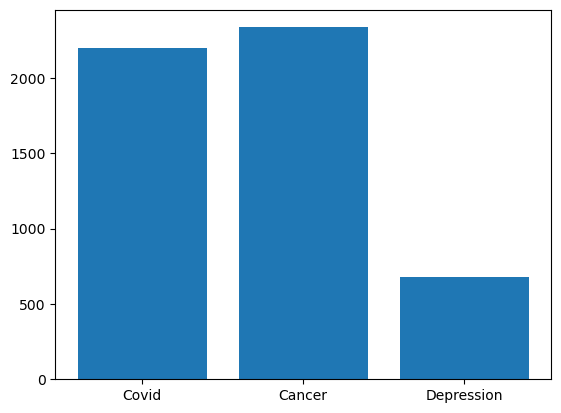

In [24]:
#visualizing dataset
x = ["Covid", "Cancer", "Depression"]
y = [covid_counts, cancer_counts, depression_counts]
plt.bar(x, y)
plt.show()

In [25]:
# converting to csv
merged_df.to_csv('C:/Users/jerra/Desktop/DAC Projects/ProjectFlux/Clinical Trials Website Webscrape/merged_df.csv', index = False)

In [26]:
# counting the number of gender trials
all_gender_keyword = 'Sexes Eligible for Study: All'
all_gender = merged_df["Gender"].str.contains(all_gender_keyword, case = False)
all_gender_df = merged_df[all_gender]
all_gender_counts = all_gender.sum()

print(f'The total number of all gender cases are {all_gender_counts}.')

The total number of all gender cases are 4256.


In [27]:
# converting all_gender_df to csv
all_gender_df.to_csv('C:/Users/jerra/Desktop/DAC Projects/ProjectFlux/Clinical Trials Website Webscrape/all_gender_df.csv')

### TF-IDF

In [28]:
# setting lemmatizer variable
lemmatizer = WordNetLemmatizer()
stopword = set(stopwords.words('english'))

In [29]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [30]:
# extracting column required for sentiment analysis
unprocessed_clinical_data = pd.DataFrame(({'Brief Summary':pd.Series(all_gender_df['Brief Summary'])}))

In [31]:
# checking for null values
unprocessed_clinical_data.isnull().sum()

Brief Summary    0
dtype: int64

In [32]:
# processing clinical trials data
def clinical_processor(clinical_data):
    # changing all texts to lowercase
    clinical_data = str(clinical_data).lower()
    
    # removing puntuation
    clinical_data = re.sub('\[.*?\]', '', clinical_data)
    
    #Removing random standalone alphabets 
    clinical_data = re.sub("[^a-z\s]", "", clinical_data)

    #Removing hyperlinks
    clinical_data = re.sub('https?://\S+|www\.\S+', '', clinical_data)

    clinical_data = re.sub('<.*?>+', '', clinical_data)

    clinical_data = re.sub('[%s]' % re.escape(string.punctuation), '', clinical_data)

    #Removing lines separated by \n
    clinical_data = re.sub('\n', '', clinical_data)

    clinical_data = re.sub('\w*\d\w*', '', clinical_data)
    #second code satisfy those conditions that weren't covered in the first line of code above

    #Removing stopwords
    clinical_data = [word for word in clinical_data.split(' ') if word not in stopword]
    clinical_data =" ".join(clinical_data)

    #Lemmatize 
    clinical_data = [lemmatizer.lemmatize(word) for word in clinical_data.split(' ')]
    clinical_data=" ".join(clinical_data)

    return clinical_data

In [33]:
# create a new variable for processed clinical data
processed_clinical_data = unprocessed_clinical_data

In [37]:
# apply the clinical_processor function
processed_clinical_data['Reviewed_summary'] = unprocessed_clinical_data['Brief Summary'].apply(clinical_processor)

In [38]:
processed_clinical_data

,Brief Summary,Reviewed_summary
30,"Health workers, especially those in patient-fa...",health worker especially patientfacing role si...
45,Our study has the objective of identifying the...,study objective identifying epidemiological pr...
65,The aim of the project is to identify the prev...,aim project identify prevalence characteristic...
87,This descriptive study examines neutralizing a...,descriptive study examines neutralizing antibo...
88,Healthcare workers are at the forefront agains...,healthcare worker forefront covid worldwide si...
...,...,...
50145,"NeuroRx is developing NRX-101, a fixed-dose co...",neurorx developing nrx fixeddose combination o...
50174,The purpose of this study is to determine whet...,purpose study determine whether psilocybinassi...
50196,The purpose of this study will to be to evalua...,purpose study evaluate effect mobile intervent...
50214,Project:EVO is a video-game based intervention...,projectevo videogame based intervention target...


In [42]:
processed_clinical_data.to_csv('C:/Users/jerra/Desktop/DAC Projects/ProjectFlux/Clinical Trials Website Webscrape/clinical_data_keywords.csv', index = False)